# Multiple Linear Regression using Scikit-Learn - Auto MPG

#### Python Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [2]:
%matplotlib inline
plt.style.use('seaborn')

#### Load the Auto MPG Data Set
Source: [UCI Machine Learning Repository - Auto MPG Data Set](https://archive.ics.uci.edu/ml/datasets/Auto+MPG)

In [3]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data'
auto_df = pd.read_csv(url, delim_whitespace=True)
auto_df.columns = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model_year', 'origin', 'car_name']

#### Fix data types for the columns - horsepower and car_name

In [4]:
auto_df.horsepower = pd.to_numeric(auto_df.horsepower, errors='coerce')
auto_df.car_name = auto_df.car_name.astype('string')

#### Eliminate null values in horseposer

In [5]:
auto_df = auto_df[auto_df.horsepower.notnull()]
len(auto_df)

391

#### Create the training and test datasets

In [6]:
X_train, X_test, y_train, y_test = train_test_split(auto_df[['acceleration', 'displacement', 'horsepower', 'weight']], auto_df['mpg'], test_size=0.25, random_state=101)

#### Display a scatter plot - horsepower vs mpg

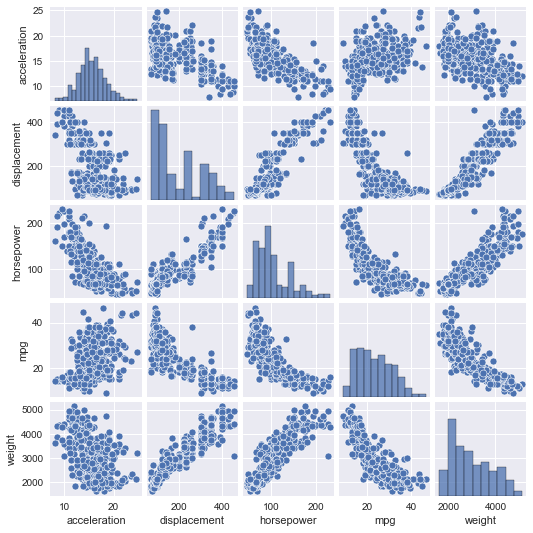

In [7]:
sns.pairplot(auto_df[['acceleration', 'displacement', 'horsepower', 'mpg', 'weight']], height=1.5)
plt.show()

#### Initialize and fit the Linear Regression model

In [8]:
model = LinearRegression(fit_intercept=True)
model.fit(X_train, y_train)

LinearRegression()

#### Display the intercept and the slope

In [9]:
model.intercept_, model.coef_

(45.86594936067745,
 array([-0.04594239, -0.00691718, -0.04363434, -0.00526944]))

#### Predict outcomes using the test data

In [10]:
y_predict = model.predict(X_test)

#### Display R-Squared value

In [11]:
r2_score(y_test, y_predict)

0.7300688684823599

#### Compute and display Adjusted R-Squared value

In [12]:
def adj_r2_score(X, y, y_hat):
    return 1 - ((1 - r2_score(y, y_hat)) * (len(y) - 1) / (len(y) - X.shape[1] - 1))

In [13]:
adj_r2_score(X_test, y_test, y_predict)

0.7184589273418163